#pytorch custom dataset

we have used some dataset before, but how you get your own data into pytorch?

one of the ways to do so: custom dataset

##domain libraries: depending on what we work on


In [1]:
import torch
from torch import nn

torch.__version__,

('2.6.0+cu124',)

In [2]:
device = 'cuda' if torch.cuda.is_available else 'cpu'
device

'cuda'

##1. get data

our dataset is a subset of the Food101 dataset.
food101 starts 101 diff classes of food and 1000 per class.

our dataset start with 3 classes of food and only 10% of images (75 training, 25 testing)

**why?**

when starting our ml projects, it is imp to try things on a small scale and then increase the scale when necessary.

the whole point is to speed how fast you can experiment.


In [3]:
import requests
import zipfile
from pathlib import Path

#setup path to a data folder
data_path =  Path("data/")
image_path = data_path / "pizza_steak_sushi"

#if the image folder doesn't exist, download it and prepare it
if image_path.is_dir():
  print(f"{image_path} directory already exists... skipping download")
else:
  print(f"{image_path} does not exist, creating one...")
  image_path.mkdir(parents=True, exist_ok=True)

# Download pizza, steak and sushi data
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip") #row not blob
  print("Downloading Pizza, steak, sushi data...")
  f.write(request.content)



#unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
  print("Unzipping pizza, steak, and sushi data...")
  zip_ref.extractall(image_path)



data/pizza_steak_sushi does not exist, creating one...
Unzipping pizza, steak, and sushi data...


## 2. Becoming one with the data (data preparation and data exploration)


In [4]:
import os # for path manipulation, intract with os, It allows you to create, delete, and rename files and directories...
def walk_through_dir(dir_path):
  """ walk through dir_path returning its contents. """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

In [5]:
walk_through_dir(image_path)

There are 2 directories and 0 images in data/pizza_steak_sushi
There are 3 directories and 0 images in data/pizza_steak_sushi/test
There are 0 directories and 31 images in data/pizza_steak_sushi/test/sushi
There are 0 directories and 25 images in data/pizza_steak_sushi/test/pizza
There are 0 directories and 19 images in data/pizza_steak_sushi/test/steak
There are 3 directories and 0 images in data/pizza_steak_sushi/train
There are 0 directories and 72 images in data/pizza_steak_sushi/train/sushi
There are 0 directories and 78 images in data/pizza_steak_sushi/train/pizza
There are 0 directories and 75 images in data/pizza_steak_sushi/train/steak


In [6]:
# Setup train and testing paths
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

##2.1 visualizing and image

Let's write some code to:
1. get all of the image paths.
2. pick a random image path using python's `random.choice()`
3. get the image class name using 'pathlib.path.parent.stem`
4. since we are working with images, let's open the image with python's PIL
5. we will show the image and print metdata

Random image path: data/pizza_steak_sushi/train/sushi/3004029.jpg
the image class: sushi
image height: 512
image width: 512
 ----------------


Text(0.5, 1.0, 'sushi: data/pizza_steak_sushi/train/sushi/3004029.jpg')

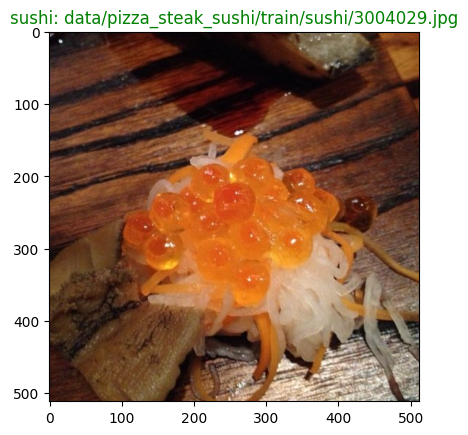

In [7]:
import random
from PIL import Image

# set seed
#random.seed(42)

# 1. Get all the image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

#2. pick a random image path
random_image_path = random.choice(image_path_list)

#3. get image class from path name (the image class is the name of directory where the image is stored)
image_class = random_image_path.parent.stem

# 4. open image
img = Image.open(random_image_path)

# 5. print metadata
print(f"Random image path: {random_image_path}")
print(f"the image class: {image_class}")
print(f"image height: {img.height}")
print(f"image width: {img.width}\n ----------------")

import matplotlib.pyplot as plt
plt.imshow(img)
plt.title(f"{image_class}: {random_image_path}", c="g")
#plt.axis(False)


Text(0.5, 1.0, 'image class: sushi | image shape: (512, 512, 3) -> [hieght, width, color channel]')

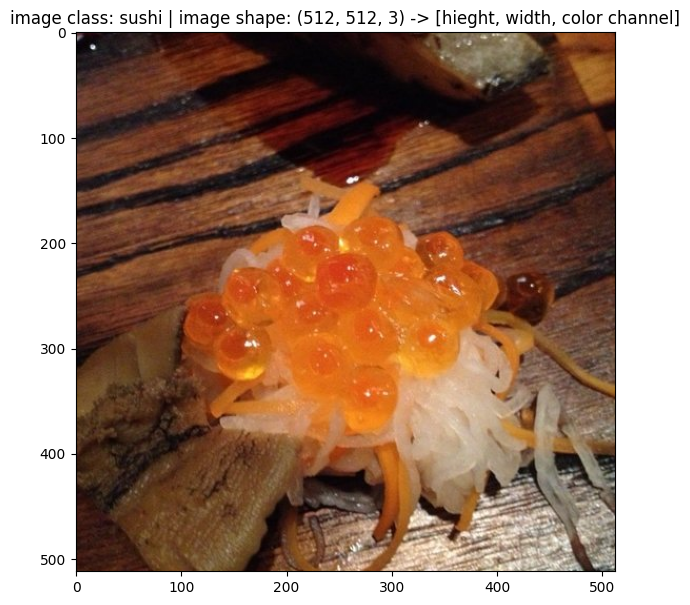

In [8]:
#try to visualize with matplotlib
import numpy as np
import matplotlib.pyplot as plt

#turn the image into an array
img_as_array = np.asarray(img)

#plot the image with matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"image class: {image_class} | image shape: {img_as_array.shape} -> [hieght, width, color channel]") #v imp to know the shape

array([[[ 94,  53,  51],
        [ 93,  51,  52],
        [ 89,  48,  52],
        ...,
        [116,  52,  24],
        [108,  47,  19],
        [ 95,  34,   6]],

       [[ 92,  54,  53],
        [ 90,  52,  51],
        [ 89,  50,  55],
        ...,
        [117,  53,  25],
        [111,  47,  19],
        [ 96,  35,   7]],

       [[ 86,  55,  53],
        [ 85,  55,  53],
        [ 86,  55,  60],
        ...,
        [120,  55,  25],
        [114,  49,  21],
        [102,  38,  10]],

       ...,

       [[ 52,  22,  14],
        [ 54,  24,  16],
        [ 55,  25,  15],
        ...,
        [157, 160, 151],
        [156, 158, 147],
        [107, 109,  98]],

       [[ 59,  26,  17],
        [ 62,  29,  20],
        [ 64,  31,  22],
        ...,
        [114, 120, 110],
        [107, 110,  99],
        [ 62,  65,  54]],

       [[ 65,  32,  23],
        [ 68,  35,  26],
        [ 70,  37,  28],
        ...,
        [ 87,  93,  83],
        [100, 103,  92],
        [115, 118, 107]]], dtype=uint8)
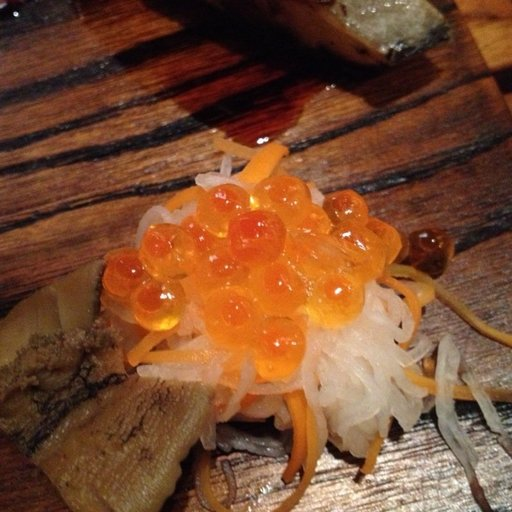

In [9]:
img_as_array

## 3. Transforming data

before we can use our image data with pytorch:
1. turn your target data into tensors (in our case, numerical representation of our images.)
2. turn it into a `torch.utils.data.dataset` and subsequently a `torch.utils.data.DataLoader`, we'll call these `dataset` and `dataloader`.

In [10]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [11]:
#print(img.min(), img.max())

## 3.1 Transforming data with `torchvision.transforms`

In [12]:
#write a transform for image
data_transform = transforms.Compose([
    #resize our image to 64x64 or 224x224
    transforms.Resize(size=(64, 64)),
    #flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5),
    # Turn the image into a torch.Tensor
    transforms.ToTensor()
])

In [13]:
data_transform(img).shape,  data_transform(img).dtype

(torch.Size([3, 64, 64]), torch.float32)

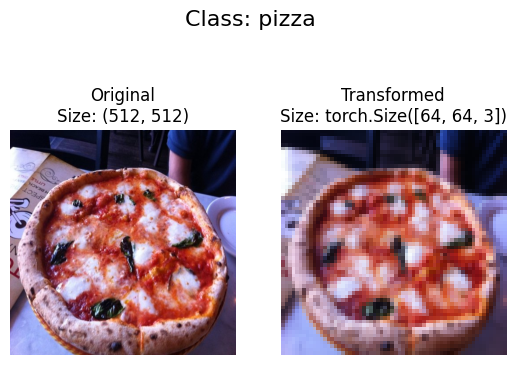

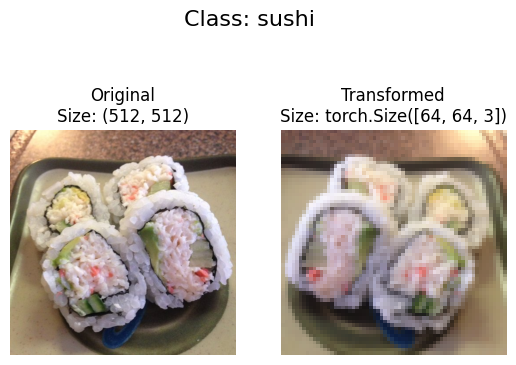

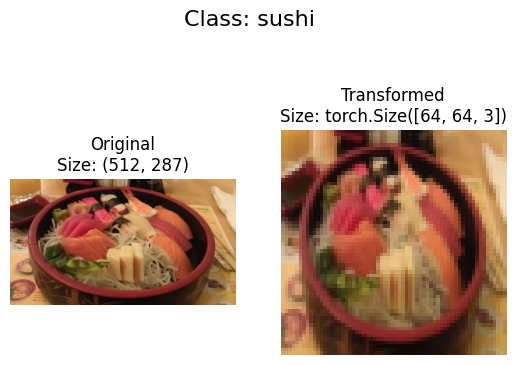

In [14]:
def plot_transformed_images(image_paths, transform, n=10, seed=42):
  """
  select random images from a path of images and loads/transforms
  them then plots the original vs the transformed version.
  """

  if seed:
    random.seed(seed)
  random_image_paths = random.sample(image_paths, k=n )
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(nrows = 1, ncols = 2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original\nSize: {f.size}")
      ax[0].axis(False)

      # Transform and plot target image
      transformed_image = transform(f).permute(1, 2, 0)      #note: we will need to change shape for matplotlib (h,w,c) cuz transform convert to (c,h,w)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed\nSize: {transformed_image.shape}")
      ax[1].axis("off")

      fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_paths=image_path_list,
                        transform=data_transform,
                        n=3,
                        seed=None)


## 4. option 1: Loading image and data using `ImageFolder`
we can load image classification data using `torchvision.datasets.ImageFolder`
https://pytorch.org/vision/stable/generated/torchvision.datasets.ImageFolder.html#imagefolder

In [15]:
#use imagefolder to create dataset(s)
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir,
                                  transform= data_transform, # a transform for the data
                                  target_transform=None) # a transform for the label , it is dir name in our case
test_data = datasets.ImageFolder(root= test_dir,
                                 transform=data_transform,
                                 target_transform=None)


In [16]:
train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [17]:
#get class names as list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [18]:
#get class names as dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [19]:
#check the lengths of our datasets
len(train_data), len(test_data)

(225, 75)

In [20]:
#train_data.targets
train_data.samples[0], train_data[0]

(('data/pizza_steak_sushi/train/pizza/1008844.jpg', 0),
 (tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
           [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
           [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
           ...,
           [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
           [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
           [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],
  
          [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
           [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
           [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
           ...,
           [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
           [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
           [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],
  
          [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
           [0.0902, 0.0863, 0.090

In [21]:
img, label = train_data[0][0], train_data[0][1]

print(f"Image tensor: \n {img}")
print(f"Image shape: {img.shape}")
print(f"image datatype: {img.dtype}")
print(f"Image label: {label, class_names[label]}")
print(f"label datatype: {type(label)}")

Image tensor: 
 tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
         [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
         [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
         ...,
         [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
         [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
         [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],

        [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
         [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
         [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
         ...,
         [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
         [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
         [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],

        [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
         [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
         [0.0902, 0.0902, 0.0902,  ..., 0.

## visualizing a loaded image from the train dataset

Original shape: torch.Size([3, 64, 64]) -> [c,h,w]
Image permute shape: torch.Size([64, 64, 3]) -> [c,h,w]


Text(0.5, 1.0, 'pizza')

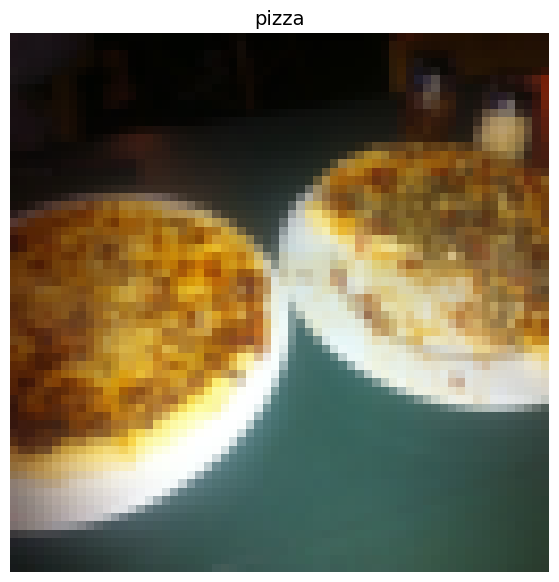

In [22]:
# Rearrange order of dimentions
img_permute = img.permute(1, 2, 0)

#print out different shapes
print(f"Original shape: {img.shape} -> [c,h,w]")
print(f"Image permute shape: {img_permute.shape} -> [c,h,w]")

#plot the image
plt.figure(figsize=(10,7))
plt.imshow(img_permute)
plt.axis("off")
plt.title(class_names[label], fontsize=14)

## 4.1 Turn dataset into dataloader
a `DataLoader` is going to help us turn our `Dataset` into iterables and we can customize the `batch_size=n` so we can see n images at a time.

In [23]:
import os
os.cpu_count()

2

In [24]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers= 1, #min 1 or os.cpu_count, the more is better
                              shuffle=True)
test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             num_workers= 1,
                             shuffle=True)

print(f"train loader: {train_dataloader} | test dataloader: {test_dataloader}")
print(f"the length of train dataloader: {len(train_dataloader)} batches of size: {BATCH_SIZE}")
print(f"the length of train dataloader: {len(test_dataloader)} batches of size: {BATCH_SIZE}")

train loader: <torch.utils.data.dataloader.DataLoader object at 0x7f54a75fb710> | test dataloader: <torch.utils.data.dataloader.DataLoader object at 0x7f54a75c4050>
the length of train dataloader: 8 batches of size: 32
the length of train dataloader: 3 batches of size: 32


the shape of train features batch: torch.Size([32, 3, 64, 64]) | the shape of train label batch: torch.Size([32]) | 32
img shape: torch.Size([3, 64, 64]) | label shape: torch.Size([])


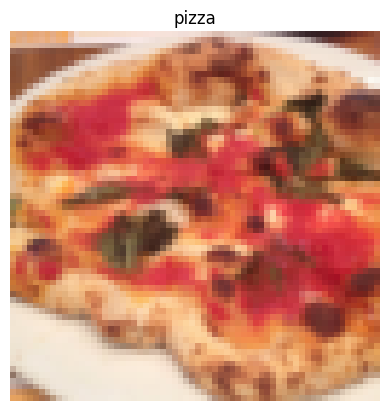

In [25]:
#lets see what was created
train_features_batch, train_label_batch = next(iter(train_dataloader))
print(f"the shape of train features batch: {train_features_batch.shape} | the shape of train label batch: {train_label_batch.shape} | {len(train_features_batch)}")

#now to plot some of the batch features randomly
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_label_batch[random_idx]

#plotting with matplotlib
plt.imshow(img.squeeze().permute(1,2,0))
plt.title(class_names[label])
plt.axis(False)

print(f"img shape: {img.shape} | label shape: {label.shape}")

In [26]:
print(img.min(), img.max()) #means normalized

tensor(0.0667) tensor(0.9961)


## Option 2: loading image data with a custom `dataset`

1. want to be able to load images from file
2. want to be be able to get class names from the dataset
3. want to be able to get classes as dictionary from the dataset

pros:
* can create a `Dataset` out of almost anything.
* Not limited to pytorch pre-built `Dataset` functions.

Cons:
* even though you could crate `Dataset from almost anything, it doesn't mean it'll work...
*using a custom `Dataset` often results in us writting more code, which could be prone to errors or performance issues.

all custom datasets in pytorc, often subclass: `torch.utils.data.dataset`

In [27]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

In [28]:
#instance of torchvision.datasets.ImageFolder
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.1 Creating a helper function to get class names

we want a function to:
1. Get the class names using `os.scandir()` to treverse a target directory (ideally the directory is in standard image classification format)
2. Raise an error if the class names aren't found (if this happens, ther might be something wrong with the directory structure).
3. turn the class names into a dict and a list and return them.

In [29]:
# Setup path for target directory
target_directory = train_dir
print(f"target dir: {target_directory}")

#get the class names from the target directory
class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names_found

target dir: data/pizza_steak_sushi/train


['pizza', 'steak', 'sushi']

In [30]:
list(os.scandir(target_directory))

[<DirEntry 'sushi'>, <DirEntry 'pizza'>, <DirEntry 'steak'>]

In [31]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
  """Finds the class folder names in a target directory. """
  # 1. Get the class names by scanning the target directory
  classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

  # 2. raise an error if class name could not be found
  if not classes:
    raise FileNotFoundError(f"couldn't find any class in directory {directory}...please check file structure.")

  # 3. Create a directory of index labels (computers prefer numbers rather than strings as labels)
  class_to_idx = {class_name: i for i, class_name in enumerate(classes)}
  return classes, class_to_idx

In [32]:
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.2 Create a custom `Dataset` to replicate `ImageFolder`
To create our own custom dataset, we want to:
1. Subclass `torch.utils.data.Dataset`
2. Init our subclass with a target directory (the directory we'd like to get data from) as well as a transform if we'd like to transform our data.
3. Create several attributes:
  * paths - paths of our images.
  * transform - the transform we would like to use
  * classes - a list of the target classes
  * class_to_idx - a dict of the target classes mapped to integer labels
4. Create a function to `load_images()`, this function will open an image.
5. overwrite the `__len()__` method to return the length of our dataset.
6. overwrite `__getitem()__` method to return a given sample when passed an index.
  

In [33]:
# 0. write a custom dataset class
from torch.utils.data import Dataset

# 1. Subclass torch.utils.data.Dataset
class ImageFolderCustom(Dataset):
  # 2. Initialize our custom dataset
  def __init__(self,
               targ_dir: str,
               transform=None):
    # 3. Create class attributes
    # Get all of the image paths
    self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg"))
    # Setup transform
    self.transform = transform
    # create classes and class_to_idx attributes
    self.classes, self.class_to_idx = find_classes(targ_dir)

  # Create a function to load images
  def load_image(self, index: int) -> Image.Image:
    """  opens an image via a path and return it. """
    image_path = self.paths[index]
    return Image.open(image_path)

  # 5. Overwrite __len__()
  def __len__(self) -> int:
    "Returns the total number of samples"
    return len(self.paths)

  # 6. Overwrite __getitem__() method to return a particular sample
  def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
    "Returns one sample of data, data and label (X, y)."
    img =self.load_image(index)
    class_name = self.paths[index].parent.name  # expects path in format: data_folder/class_name/image.jpg
    class_idx = self.class_to_idx[class_name]

    #transform if necessary
    if self.transform:
      return self.transform(img), class_idx #return data label (X,y)
    else:
      return img, class_idx #return untransformed img and label

In [34]:
img, label = train_data[0]

In [35]:
img, label

(tensor([[[0.1137, 0.1020, 0.0980,  ..., 0.1255, 0.1216, 0.1176],
          [0.1059, 0.0980, 0.0980,  ..., 0.1294, 0.1294, 0.1294],
          [0.1020, 0.0980, 0.0941,  ..., 0.1333, 0.1333, 0.1333],
          ...,
          [0.1098, 0.1098, 0.1255,  ..., 0.1686, 0.1647, 0.1686],
          [0.0902, 0.0941, 0.1098,  ..., 0.1686, 0.1647, 0.1686],
          [0.0863, 0.0863, 0.0980,  ..., 0.1686, 0.1647, 0.1647]],
 
         [[0.0745, 0.0706, 0.0745,  ..., 0.0588, 0.0588, 0.0588],
          [0.0745, 0.0706, 0.0745,  ..., 0.0627, 0.0627, 0.0627],
          [0.0706, 0.0745, 0.0745,  ..., 0.0706, 0.0706, 0.0706],
          ...,
          [0.1255, 0.1333, 0.1373,  ..., 0.2510, 0.2392, 0.2392],
          [0.1098, 0.1176, 0.1255,  ..., 0.2510, 0.2392, 0.2314],
          [0.1020, 0.1059, 0.1137,  ..., 0.2431, 0.2353, 0.2275]],
 
         [[0.0941, 0.0902, 0.0902,  ..., 0.0157, 0.0196, 0.0196],
          [0.0902, 0.0863, 0.0902,  ..., 0.0196, 0.0157, 0.0196],
          [0.0902, 0.0902, 0.0902,  ...,

In [36]:
# create transform
train_transforms = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])
test_transforms = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

In [37]:
train_data_custom = ImageFolderCustom(targ_dir=train_dir,
                                      transform=train_transforms)
test_data_custom = ImageFolderCustom(targ_dir=test_dir,
                                     transform= test_transforms)

In [38]:
len(train_data_custom), len(train_data)

(225, 225)

In [39]:
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x7f54a7676450>,
 <__main__.ImageFolderCustom at 0x7f54a766b5d0>)

In [40]:
train_data_custom.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [41]:
print(train_data_custom.classes==train_data.classes)
print(test_data_custom.classes==test_data.classes)

True
True


### 5.3 Create a function to display random images

1. Take in `Dataset` and a number of other parameters such as class names and how many images to visualize.
2. To prevent the display getting out of hand, let's cap the number of images to see to 10.
3. Set the random seed for reproducability.
4. Get a list of random sample indexes from the target dataset.
5. Setup a matplotlib plot.
6. Look through the random sample images indexes and plot them with matplotlib.
7. Make sure the dimentions of our images line up with matplotlib (HWC).

In [42]:
# 1. Create a function to take in a dataset
def display_random_images(dataset: torch.utils.data.dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):

  # 2. Adjuct display if n is too high
  if n > 10:
    n = 10
    display_shape = False
    print(f"For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.")

  # 3. Set the seed
  if seed:
    random.seed(seed)

  # 4. Get a list of random samples indexes
  random_sample_indexes = random.sample(range(len(dataset)), k=n)

  # 5. Setup matplotlib
  plt.figure(figsize=(16 , 8))

  # 6. Loop through random indexes and plot them with matplotlib
  for i, targ_sample in enumerate(random_sample_indexes):
    targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

    # 7. Adjuct the dim (HWC) for plotting
    adjucted_targ_image = targ_image.permute(1, 2, 0)

    # Plot adjucted samples
    plt.subplot(1, n, i +1)
    plt.imshow(adjucted_targ_image)
    plt.axis("off")
    if classes:
      title = f"class: {classes[targ_label]}"
      if display_shape:
        title += f"\nshape: {adjucted_targ_image.shape}"
    plt.title(title)

  plt.tight_layout()
  plt.show()

In [43]:
random_sample_indexes = random.sample(range(len(train_data_custom)), k=10)
random_sample_indexes

[3, 185, 5, 61, 34, 120, 133, 130, 35, 166]

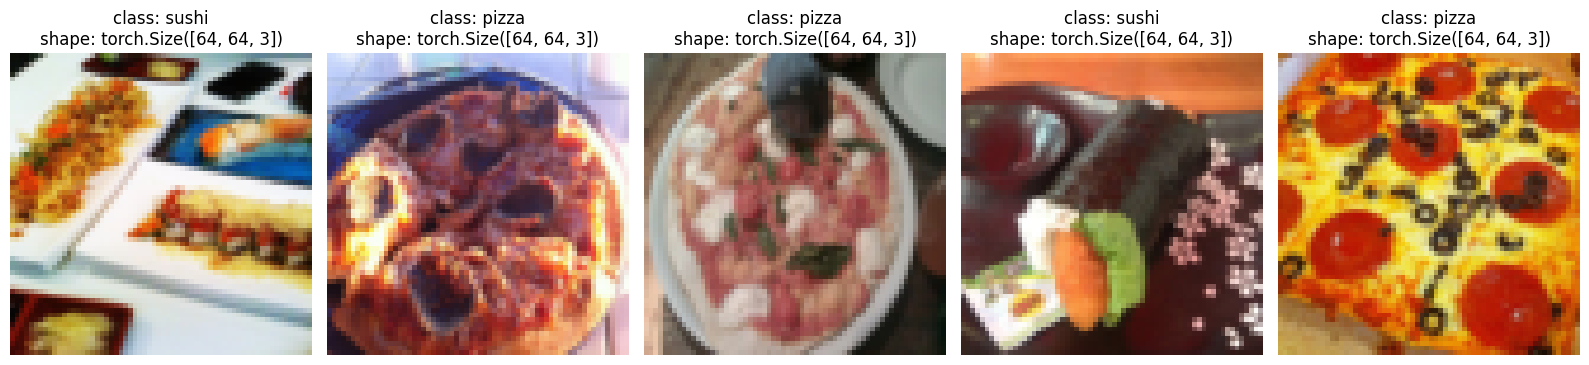

In [44]:
display_random_images(dataset=train_data,
                      n=5,
                      classes=class_names,
                      seed=42)

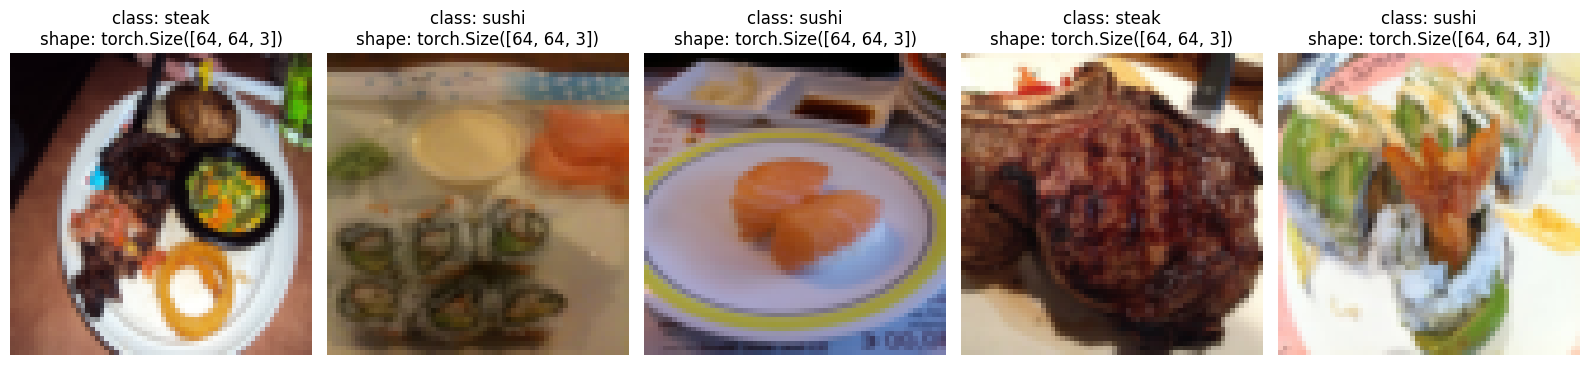

In [45]:
display_random_images(dataset=train_data_custom,
                      n=5,
                      classes=class_names,
                      seed=42)

 ### 5.4 Turn custom loaded images into `Dataloader`s

In [46]:
from torch.utils.data import dataloader
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

train_dataloader_custom = DataLoader(dataset=train_data_custom,
                                     batch_size=BATCH_SIZE,
                                     num_workers=NUM_WORKERS,
                                     shuffle=True)

test_dataloader_custom = DataLoader(dataset=test_data_custom,
                                    batch_size=BATCH_SIZE,
                                    num_workers=NUM_WORKERS,
                                    shuffle=True)

train_dataloader_custom, test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x7f54a740bb50>,
 <torch.utils.data.dataloader.DataLoader at 0x7f54a7408410>)

In [47]:
img_custom, label_custom = next(iter(train_dataloader_custom))
img_custom.shape, label_custom.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

## 6. Other forms of transforms (data augmentation)

* Data augmentation: to increase amount of data by adding slightly modified copies of already existing data.. or newly created synthetic data from existing data.


* it is the process of artificially adding diversity to your training data.

in the case of image data, this may mean applying various image transformations to the training images.

- example: original -> rotate -> shift -> zoom. (looking to the picture from different perspective.)

- types of data augmentations: cropping,replacing, sheering.
- this result in a model which is more generalizable for unseen data.

https://pytorch.org/vision/0.20/transforms.html#:~:text=In%20Torchvision%200.15%20%28March%202023%29%2C%20we%20released%20a,images%20but%20also%20bounding%20boxes%2C%20masks%2C%20or%20videos.

https://pytorch.org/blog/how-to-train-state-of-the-art-models-using-torchvision-latest-primitives/


In [48]:
# let's look at TrivialAugmentWide
from torchvision import transforms

train_transform = transforms.Compose([
                                      transforms.Resize(size=(224, 224)),
                                      transforms.TrivialAugmentWide(num_magnitude_bins=31),
                                      transforms.ToTensor()
])

test_transform = transforms.Compose([
                                    transforms.Resize(size=(224, 224)),
                                    transforms.ToTensor()
])


In [49]:
# Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))
image_path_list[:10]

[PosixPath('data/pizza_steak_sushi/test/sushi/175783.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/1680893.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/684266.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/1245193.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/3196729.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/343036.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/858157.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/1742201.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/1230335.jpg'),
 PosixPath('data/pizza_steak_sushi/test/sushi/2540511.jpg')]

 trivial augment enhances power of randomness, it selects random features and increase intensity from 1 to 31

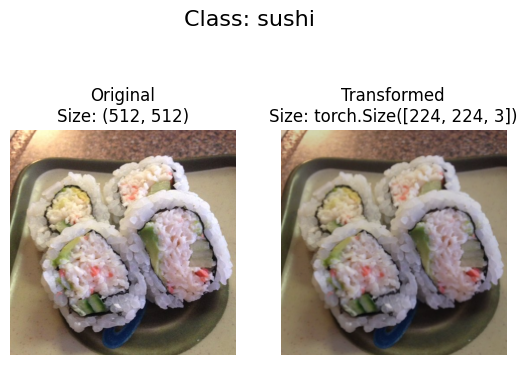

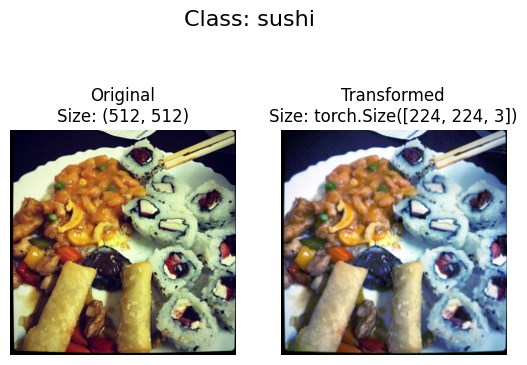

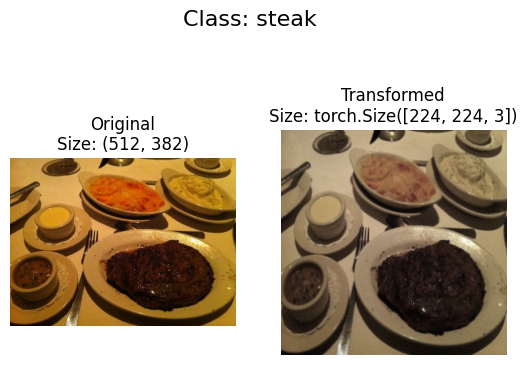

In [50]:
plot_transformed_images(image_paths=image_path_list,
                        transform= train_transform,
                        n = 3,
                        seed = None)  # adding diversity

## 7. Model 0: TinyVGG without data augmentation

Let's replicate TinyVGG architecture from CNN explainer website

### 7.1 Creating transforms and loading data for model 0

In [51]:
# create simple transform
simple_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])

In [52]:
# 1. Load and transform data
from torchvision import datasets
train_data_simple = datasets.ImageFolder(root=train_dir,
                                         transform=simple_transform)
test_data_simple = datasets.ImageFolder(root=test_dir,
                                        transform=simple_transform)

# 2. Turn the datasets into dataloaders
import os
from torch.utils.data import DataLoader

BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

train_dataloader_simple = DataLoader(dataset=train_data_simple,
                                     batch_size= BATCH_SIZE,
                                     shuffle=True,
                                     num_workers= NUM_WORKERS)

test_dataloader_simple = DataLoader(dataset=test_data_simple,
                                     batch_size= BATCH_SIZE,
                                     shuffle=True,
                                     num_workers= NUM_WORKERS)

In [53]:
X, y = next(iter(train_dataloader_simple))
print(X.shape)

torch.Size([32, 3, 64, 64])


### 7.2 Create TinyVGG model class

In [54]:
# Set agnostic device
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [55]:
class TinyVGG(nn.Module):
  """
    Model architecture copying TinyVGG from CNN Explainer
  """
  def __init__(self,
             input_shape: int,
             hidden_units: int,
             output_shape: int) -> None:
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2) #default stride value is same as kernel size
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2) # by default stride value is same as kernel size
    )
    self.classifier = nn.Sequential(
          nn.Flatten(),
          nn.Linear(in_features=hidden_units*13*13,
                      out_features=output_shape)
    )


  def forward(self, x):
    x = self.conv_block_1(x)
    #print(x.shape)
    x = self.conv_block_2(x)
    #print(x.shape)
    x= self.classifier(x)
    #print(x.shape)
    return x
    #return self.classifier(self.conv_block_2(self.conv_block_1)) # benefits from operator fusion to speed computation

In [56]:
torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3, #number of color channels in our image data
                  hidden_units = 10,
                  output_shape=len(train_data.classes)).to(device)

model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

### 7.3 try a forward pass on a single image (to test the model)

In [57]:
# Get a single image batch
image_batch, label_batch = next(iter(train_dataloader_simple))
image_batch.shape, label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [58]:
#try forward pass to know in channels
model_0(image_batch.to(device))

tensor([[ 2.0795e-02, -1.9510e-03,  9.5212e-03],
        [ 1.8440e-02,  2.4669e-03,  6.6609e-03],
        [ 1.7695e-02,  1.0282e-03,  9.4975e-03],
        [ 2.4446e-02, -3.3489e-03,  9.5877e-03],
        [ 1.9939e-02,  6.9129e-04,  1.0778e-02],
        [ 2.1281e-02,  2.0434e-03,  5.0046e-03],
        [ 2.0996e-02,  1.6415e-04,  1.2481e-02],
        [ 2.1566e-02, -1.9607e-03,  9.7175e-03],
        [ 2.4500e-02, -4.7904e-03,  8.5394e-03],
        [ 2.0239e-02, -4.7979e-04,  1.0907e-02],
        [ 2.2219e-02, -4.1816e-04,  9.8173e-03],
        [ 2.2318e-02, -2.1642e-03,  9.4428e-03],
        [ 2.1851e-02, -3.7226e-03,  8.3784e-03],
        [ 2.2881e-02, -1.7559e-03,  1.0299e-02],
        [ 2.1635e-02, -4.3995e-03,  9.4990e-03],
        [ 2.2101e-02, -4.1469e-03,  9.3904e-03],
        [ 2.1226e-02, -4.4215e-03,  1.1476e-02],
        [ 2.1698e-02, -2.7458e-03,  8.4966e-03],
        [ 1.9974e-02, -3.3062e-07,  8.4496e-03],
        [ 1.8308e-02,  1.6378e-03,  8.5491e-03],
        [ 2.0768e-02

In [59]:
10*13*13

1690

### 7.4 Use `torchinfo` to get an idea of the shapes going through our model

In [60]:
#install torchinfo, import if it is available OMG this isssssss smooth
try:
  import torchinfo
except:
  !pip install torchinfo
  import torchinfo

from torchinfo import summary
summary(model_0, input_size=[1, 3, 64, 64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
│    └─ReLU: 2-7                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
│    └─ReLU: 2-9                         [1, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequentia

 ### 7.5 Create train and test loops functions

`train_step()` - takes in a model and dataloader and trains the model on the dataloader.

`test_step()` - takes in a model and dataloader and evaluates the model on the dataloader.

In [61]:
#make a func for accuracy metric
def acc_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = correct / len(y_true)
  return acc

#set loss function
loss_fn = nn.CrossEntropyLoss()

#set optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [62]:
# training step
def train_step(model: nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               acc_fn,
               device: torch.device = device
               ):
  train_loss = 0
  train_acc = 0

  model.train()

  for batch, (X, y) in enumerate(data_loader):
    # 0. Put data on target device
    X = X.to(device)
    y = torch.tensor(y).to(device) if isinstance(y, int) else y.to(device)

    # 1. Do a forward pass
    y_pred = model(X)

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y)
    train_loss += loss.item()

    # Calculate the acc
    acc = acc_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
    train_acc += acc

    #diff way to calculate the acc
    # y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    # train_acc += (y_pred_class==y).sum().item()/len(y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Backward pass
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

  #calculate the batch avg loss and acc
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)

  return train_loss, train_acc
  #print(f"Train Loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")

In [63]:
# evaluation step
def test_step(
    model: nn.Module,
    data_loader: torch.utils.data.DataLoader,
    loss_fn: torch.nn.Module,
    acc_fn,
    device: torch.device = device
):
  #put model on eval mode
  model.eval()

  test_loss, test_acc = 0, 0

  with torch.inference_mode():
    for batch, (X, y) in enumerate(data_loader):

      # 0. Put X, y on device
      X = X.to(device)
      y = y.to(device)

      # 1. Forward pass
      test_pred = model(X)

      #calculate the loss and acc
      test_loss += loss_fn(test_pred, y)
      test_acc += acc_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

    test_loss /= len(data_loader)
    test_acc /= len(data_loader)

  return test_loss, test_acc
  #print(f"Test Loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%")

### 7.6 Creating a `train()` function to combine `train_step()` and `test_step()`

In [64]:
from tqdm.auto import tqdm

# 1. Create a train function that takes in various model parameters + optimizer + dataloaders + loss function etc...
def train(model: torch.nn.Module,
          train_dataloader,
          test_dataloader,
          optimizer,
          acc_fn,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5,
          device = device
          ):

  # 2. Create empty results dictionary
  results = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []}

  # 3. Loop through training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step( model=model,
                                        data_loader=train_dataloader,
                                        loss_fn=loss_fn,
                                        optimizer=optimizer,
                                        acc_fn=acc_fn,
                                        device= device
                                        )
    test_loss, test_acc = test_step(model=model,
                                    data_loader=test_dataloader,
                                    loss_fn=loss_fn,
                                    acc_fn=acc_fn,
                                    device=device)

    # 4. Print out what is happening
    print(f"Epoch: {epoch} | train loss: {train_loss:.4f} | train acc: {train_acc:.4f}% | test loss: {test_loss:.4f} | test acc: {test_acc:.4f}%")

    # 5. Update results dictionary
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  # 6. Return the filled results at the end of the epochs
  return results

### 7.7 Train and evaluate model 0

In [65]:
# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
NUM_EPOCHS = 20

# Recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape = 3,
                  hidden_units= 10,
                  output_shape=len(train_data.classes)).to(device)


# Setup a loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_0.parameters(),
                             lr= 0.001)

#make a func for accuracy metric
def acc_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = correct / len(y_true)
  return acc

# Start the timer
from timeit import default_timer as Timer
start_time = Timer()

# Train model 0
model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        acc_fn=acc_fn,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS,
                        device=device
                        )

# End the timer and print out how long it took
end_time = Timer()
print(f"Total training time: {end_time-start_time:.3f} Seconds.")

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 0 | train loss: 1.1063 | train acc: 0.3047% | test loss: 1.0979 | test acc: 0.3409%
Epoch: 1 | train loss: 1.0835 | train acc: 0.4453% | test loss: 1.0777 | test acc: 0.4223%
Epoch: 2 | train loss: 1.1063 | train acc: 0.2812% | test loss: 1.0818 | test acc: 0.3826%
Epoch: 3 | train loss: 1.0755 | train acc: 0.4766% | test loss: 1.0780 | test acc: 0.5047%
Epoch: 4 | train loss: 1.0663 | train acc: 0.4023% | test loss: 1.0518 | test acc: 0.5038%
Epoch: 5 | train loss: 0.9956 | train acc: 0.5820% | test loss: 1.0466 | test acc: 0.3106%
Epoch: 6 | train loss: 0.8852 | train acc: 0.5625% | test loss: 1.0789 | test acc: 0.3409%
Epoch: 7 | train loss: 0.9374 | train acc: 0.4688% | test loss: 1.0960 | test acc: 0.3722%
Epoch: 8 | train loss: 0.9132 | train acc: 0.5156% | test loss: 1.0390 | test acc: 0.4754%
Epoch: 9 | train loss: 0.8080 | train acc: 0.6172% | test loss: 0.9934 | test acc: 0.4432%
Epoch: 10 | train loss: 0.9013 | train acc: 0.5273% | test loss: 1.0346 | test acc: 0.4735

In [66]:
model_0_results

{'train_loss': [1.106319010257721,
  1.0835325121879578,
  1.106265366077423,
  1.075518786907196,
  1.0663009136915207,
  0.9956367090344429,
  0.8852275982499123,
  0.9374431669712067,
  0.9132049009203911,
  0.8080442454665899,
  0.901290737092495,
  0.8347414433956146,
  0.7878817804157734,
  0.7283471152186394,
  0.7466988749802113,
  0.8252759724855423,
  0.758174479007721,
  0.7499873340129852,
  0.6681128232739866,
  0.672182209789753],
 'train_acc': [0.3046875,
  0.4453125,
  0.28125,
  0.4765625,
  0.40234375,
  0.58203125,
  0.5625,
  0.46875,
  0.515625,
  0.6171875,
  0.52734375,
  0.6796875,
  0.625,
  0.671875,
  0.6953125,
  0.56640625,
  0.71484375,
  0.6875,
  0.73828125,
  0.734375],
 'test_loss': [tensor(1.0979),
  tensor(1.0777),
  tensor(1.0818),
  tensor(1.0780),
  tensor(1.0518),
  tensor(1.0466),
  tensor(1.0789),
  tensor(1.0960),
  tensor(1.0390),
  tensor(0.9934),
  tensor(1.0346),
  tensor(1.0567),
  tensor(1.0312),
  tensor(1.0713),
  tensor(1.0851),
  ten

### 7.8 Plot the loss curves of model 0

A **loss curve** is a way of tracking your model's progress over time.

loss over time -> to go down over time. (converge)

loss curve -> a way to evaluate our model performance over time.

In [67]:
# Get the model_0_results keys
model_0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [68]:
def plot_loss_curves(results: Dict[str, List[float]]):
  """ plots training curves of results dictionary. """
  # get the loss values of the results dictionary (traing and test)
  loss = results["train_loss"]
  test_loss = results["test_loss"]

  # Get the accuracy values of the results dictionary (training and test)
  accuracy = results["train_acc"]
  test_accuracy = results["test_acc"]

  # Fiqure out how many epochs were there
  epochs = range(len(results["train_acc"]))

  # Setup a plot
  plt.figure(figsize=(15, 7))

  #plot the loss
  plt.subplot(1, 2, 1)
  plt.plot(epochs, loss, label="train_loss")
  plt.plot(epochs, test_loss,label="test_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  #plot the accuracy
  plt.subplot(1, 2, 2)
  plt.plot(epochs, accuracy, label="train_accuracy")
  plt.plot(epochs, test_accuracy, label="test_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend();

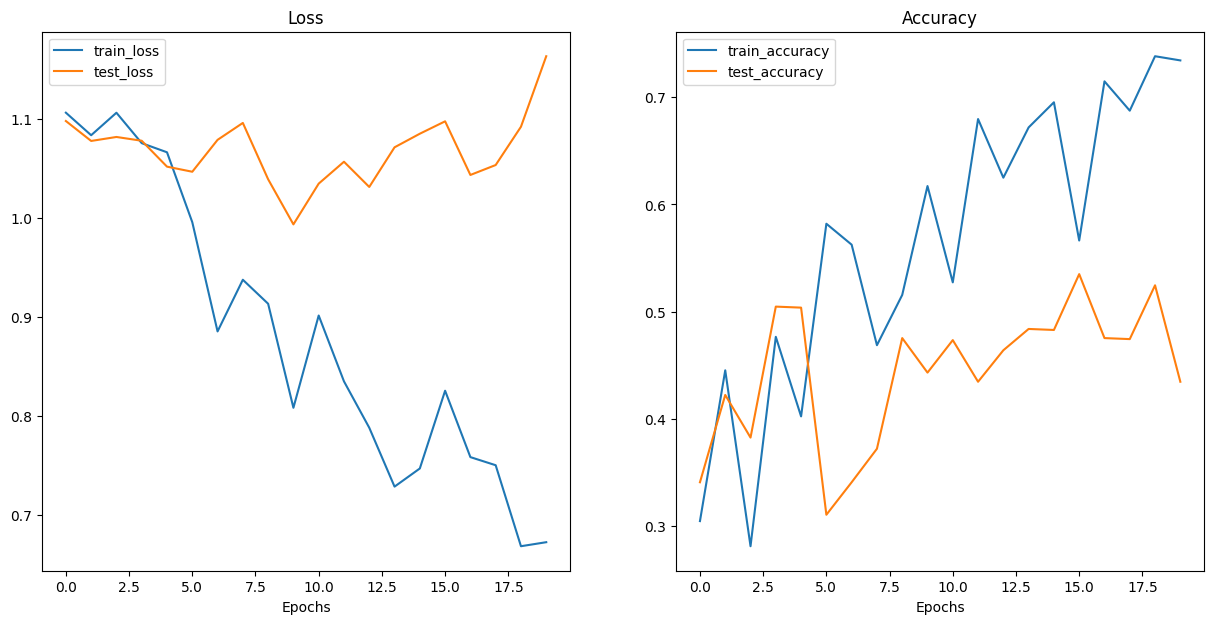

In [69]:
plot_loss_curves(model_0_results)

## 8. what should an ideal loss curve look like?

A loss curve is one of the mose helpful ways to troubleshoot a model.

* underfitting - train and test curve could be lower - nearer to 0 but not.
* overfitting - train curve near to 0 but test curve not. - training curve is lower than test curve.
* just right - train and loss curves are both similar and low - near 0.

source: google interpreting loss curve guide.
https://developers.google.com/machine-learning/crash-course/overfitting/interpreting-loss-curves

--------------------------------------------------

### -> to deal with overfitting:
* if we want to use transfer learning to remove overfitting: https://pytorch.org/vision/master/models.html
* learning rate scheduler - adjuct learing rate over time - reduce lr so model does not update patterns too much in later epochs. when we are closer and closer to ideal loss curve we would take smaller steps to not miss convergeing.
* early stopping - train for certain steps but when test loss increase stop learning.
* simplify model - so it can generalize for unseen data and not only learn too well train data.
* Better data. / more data.
* Data augmentation - increase diversity and size of dataset like in transforms.
--------------------------------------------

###  --> to deal with underfitting:
* teak learning rate - lower lr.
* add more units/ layers - ex: hidden layers.
* train for longer - increase epochs. but not too long so it start overfit -> make balance.
* use transfer learning.
* use less regularization - if we too much prevent overfit, it can end up w/ underfit.
------------------------------------------------

> for our model, it looks like there are underfitting.

## 9. Model 1: TinyVGG with Data Augmentation

Now let's try another modelling experiment this time using the same model as before with some data augmentation.


In [70]:
### 9.1 Create transform with data augmentation
from torchvision import transforms
train_transform_trivial = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_transform_simple = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])

### 9.2 Create train and test `Dataset`'s and `DataLoader`'s with data augmentation

In [71]:
# Turn image folders into Datasets
from torchvision import datasets

train_data_augmented = datasets.ImageFolder(root= train_dir,
                                            transform=train_transform_trivial)

test_data_simple = datasets.ImageFolder(root=test_dir,
                                        transform=test_transform_simple)

In [72]:
# Turn our datasets into DataLoaders
import os
from torch.utils.data import DataLoader

BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

train_dataloader_augmented = DataLoader(dataset=train_data_augmented,
                                        batch_size=BATCH_SIZE,
                                        num_workers=NUM_WORKERS,
                                        shuffle=True)

test_dataloader_simple = DataLoader(dataset=test_data_simple,
                                    batch_size=BATCH_SIZE,
                                    num_workers=NUM_WORKERS,
                                    shuffle=True)


### 9.3 Construct and train model 1

This time we will use same model architecture but now with data augmentation of training data.

In [73]:
# create model 1 and send it to the target device
torch.manual_seed(42)
model_1 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(train_data_augmented.classes)).to(device)

model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

wooooow! now we have model and dataloaders, let's create a loss function and an optimizer and call upon our `train()` function to train and evaluate our model

In [74]:
# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
NUM_EPOCHS = 20

# Setup loss function
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(),
                             lr=0.001)

# Start the timer
from timeit import default_timer as Timer
start_time = Timer()

# Train model 1
model_1_results = train(model=model_1,
                        train_dataloader=train_dataloader_augmented,
                        test_dataloader= test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        acc_fn=acc_fn,
                        epochs=NUM_EPOCHS,
                        device=device)

# End the timer and print out how long it took
end_time = Timer()
print(f"Total training time for model_1: {end_time-start_time:.3f} seconds.")

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 0 | train loss: 1.1049 | train acc: 0.2500% | test loss: 1.1017 | test acc: 0.2604%
Epoch: 1 | train loss: 1.0792 | train acc: 0.4258% | test loss: 1.1066 | test acc: 0.3400%
Epoch: 2 | train loss: 1.1276 | train acc: 0.3047% | test loss: 1.1021 | test acc: 0.3598%
Epoch: 3 | train loss: 1.0823 | train acc: 0.4258% | test loss: 1.0924 | test acc: 0.3598%
Epoch: 4 | train loss: 1.1019 | train acc: 0.3047% | test loss: 1.0924 | test acc: 0.3400%
Epoch: 5 | train loss: 1.1111 | train acc: 0.3867% | test loss: 1.0970 | test acc: 0.3920%
Epoch: 6 | train loss: 1.0778 | train acc: 0.4180% | test loss: 1.0717 | test acc: 0.4725%
Epoch: 7 | train loss: 1.0718 | train acc: 0.3633% | test loss: 1.0654 | test acc: 0.4640%
Epoch: 8 | train loss: 1.0612 | train acc: 0.3320% | test loss: 1.0449 | test acc: 0.4631%
Epoch: 9 | train loss: 1.0562 | train acc: 0.3594% | test loss: 1.0247 | test acc: 0.4744%
Epoch: 10 | train loss: 1.0603 | train acc: 0.3516% | test loss: 1.0534 | test acc: 0.4129

In [75]:
!nvidia-sim

/bin/bash: line 1: nvidia-sim: command not found


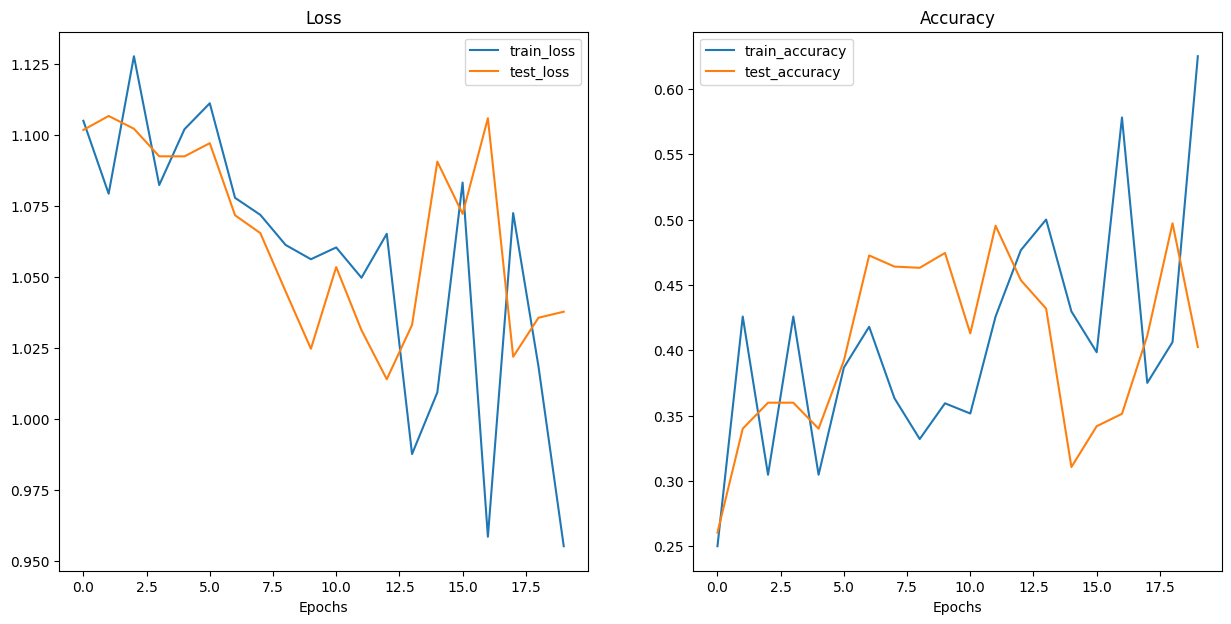

In [76]:
#plot the loss curve of model 1 results
plot_loss_curves(model_1_results)

> seems like both underfit and overfit.

## 10. Compare model results
After evaluating our modelling experiments on their own, it is important to compare them to each other.

There is a few different ways to do this:
1. Hard coding (what we are doing)
2. pytorch + tensorboard: https://pytorch.org/tutorials/recipes/recipes/tensorboard_with_pytorch.html
3. weights and biases: https://wandb.ai/site
4. MLflow: https://mlflow.org/

In [77]:
import pandas as pd
model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)

model_0_df

train_loss  train_acc       test_loss  test_acc
0     1.106319   0.304688  tensor(1.0979)  0.340909
1     1.083533   0.445312  tensor(1.0777)  0.422348
2     1.106265   0.281250  tensor(1.0818)  0.382576
3     1.075519   0.476562  tensor(1.0780)  0.504735
4     1.066301   0.402344  tensor(1.0518)  0.503788
5     0.995637   0.582031  tensor(1.0466)  0.310606
6     0.885228   0.562500  tensor(1.0789)  0.340909
7     0.937443   0.468750  tensor(1.0960)  0.372159
8     0.913205   0.515625  tensor(1.0390)  0.475379
9     0.808044   0.617188  tensor(0.9934)  0.443182
10    0.901291   0.527344  tensor(1.0346)  0.473485
11    0.834741   0.679688  tensor(1.0567)  0.434659
12    0.787882   0.625000  tensor(1.0312)  0.464015
13    0.728347   0.671875  tensor(1.0713)  0.483902
14    0.746699   0.695312  tensor(1.0851)  0.482955
15    0.825276   0.566406  tensor(1.0976)  0.535038
16    0.758174   0.714844  tensor(1.0434)  0.475379
17    0.749987   0.687500  tensor(1.0534)  0.474432
18    0.668113   0.738281  tensor(1.0921)  0.524621
19    0.672182   0.734375  tensor(1.1634)  0.434659

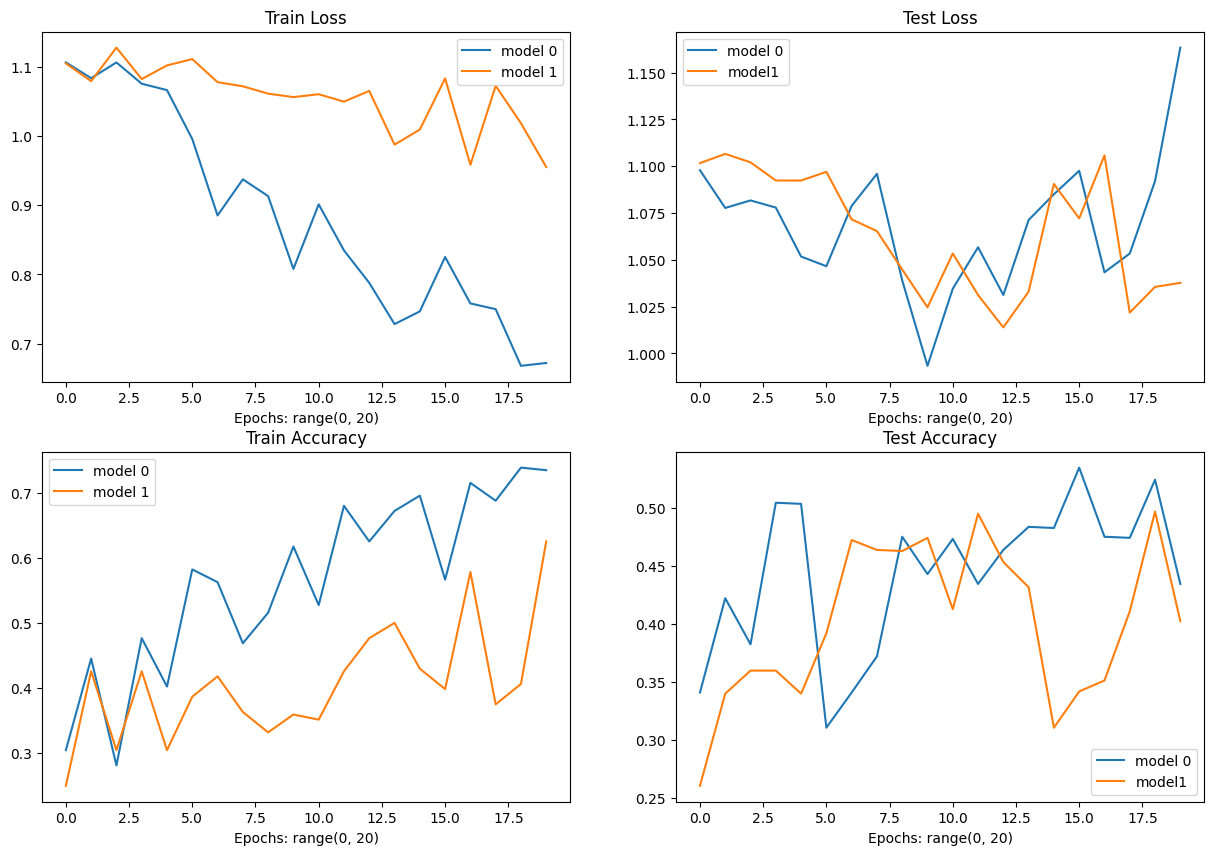

In [78]:
# Setup a plot
plt.figure(figsize=(15, 10))

# Get number of epochs
epochs = range(len(model_0_df))

# Plot train loss
plt.subplot(2, 2, 1)
plt.plot(epochs, model_0_df["train_loss"], label="model 0")
plt.plot(epochs, model_1_df["train_loss"], label="model 1")
plt.title("Train Loss")
plt.xlabel(f"Epochs: {epochs}")
plt.legend()

# Plot test loss
plt.subplot(2, 2, 2)
plt.plot(epochs, model_0_df["test_loss"], label="model 0")
plt.plot(epochs, model_1_df["test_loss"], label="model1")
plt.title("Test Loss")
plt.xlabel(f"Epochs: {epochs}")
plt.legend()

# Plot train accuracy
plt.subplot(2, 2, 3)
plt.plot(epochs, model_0_df["train_acc"], label="model 0")
plt.plot(epochs, model_1_df["train_acc"], label="model 1")
plt.title("Train Accuracy")
plt.xlabel(f"Epochs: {epochs}")
plt.legend()

# Plot test accuracy
plt.subplot(2, 2, 4)
plt.plot(epochs, model_0_df["test_acc"], label="model 0")
plt.plot(epochs, model_1_df["test_acc"], label="model1")
plt.title("Test Accuracy")
plt.xlabel(f"Epochs: {epochs}")
plt.legend()

## 11. Making a prediction on a custom image

Although we have trined a model on custom data....how do you make prediction on a sample/image that is not in training and testing datasets.

In [79]:
# Download custom image
import requests
from pathlib import Path

# Setup custom image path
data_path = Path("data")
data_path.mkdir(exist_ok=True)
custom_image_path = data_path / "pizza.jpg"

# Download the image if it doesn't already exist
if not custom_image_path.is_file():
    response = requests.get("https://raw.githubusercontent.com/esraalmaeeni/pytorch-zero-to-mastery-MyPractice/main/images/pizza.jpg")
    print(f"Downloading {custom_image_path}...")
    with open(custom_image_path, "wb") as f:
        f.write(response.content)
else:
    print(f"{custom_image_path} already exists, skipping download...")

### 11.1 Loading in a custom image with pytorch

we have to make sure our custom image is in same format as the data our model was trained on.

* In tensor form with datatype (torch.float32)
* Of shape 64x64x3
* on the right device

we can read an image into pytorch using
https://pytorch.org/vision/2.0/io.html

In [80]:
custom_image_path

PosixPath('data/pizza.jpg')

In [81]:
import imghdr

file_type = imghdr.what(custom_image_path)
print(f"The actual file type is: {file_type}")

The actual file type is: jpeg


<ipython-input-81-ce7a42598e27>:1: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [82]:
import torchvision

# Read in custom image
custom_image_uint8 = torchvision.io.read_image(custom_image_path)
print(f"custom image shape: {custom_image_uint8.shape}")
print(f"custom image dtype: {custom_image_uint8.dtype}")
print(f"custom image tensor: \n {custom_image_uint8}")

custom image shape: torch.Size([3, 3456, 5184])
custom image dtype: torch.uint8
custom image tensor: 
 tensor([[[ 26,  26,  26,  ..., 133, 133, 132],
         [ 27,  27,  27,  ..., 132, 133, 133],
         [ 27,  27,  27,  ..., 128, 130, 132],
         ...,
         [151, 145, 137,  ..., 204, 206, 205],
         [152, 147, 140,  ..., 206, 204, 202],
         [150, 148, 143,  ..., 205, 204, 201]],

        [[ 24,  24,  24,  ...,  70,  70,  69],
         [ 25,  25,  25,  ...,  69,  70,  70],
         [ 25,  25,  25,  ...,  65,  67,  69],
         ...,
         [ 99,  93,  85,  ..., 172, 170, 169],
         [ 99,  95,  88,  ..., 173, 170, 168],
         [ 97,  96,  91,  ..., 175, 169, 167]],

        [[ 12,  12,  12,  ...,   1,   1,   0],
         [ 13,  13,  13,  ...,   0,   1,   1],
         [ 13,  13,  13,  ...,   0,   0,   2],
         ...,
         [ 42,  35,  25,  ..., 161, 158, 157],
         [ 45,  38,  30,  ..., 166, 161, 158],
         [ 43,  39,  34,  ..., 167, 163, 158]]], dty

(<matplotlib.image.AxesImage at 0x7f54a73aac50>,)

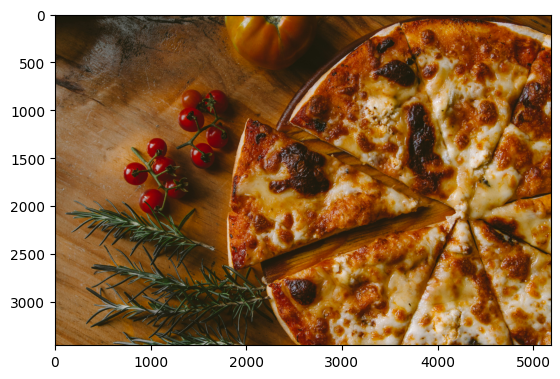

In [83]:
plt.imshow(custom_image_uint8.permute(1,2,0)),

### 11.2 Making a prediction on a custom image with a trained Pytorch model

#### 11.2 convert image shape and type

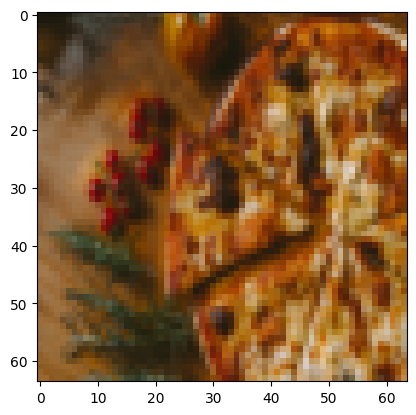

In [84]:
from torchvision import transforms
resize = transforms.Resize(size=(64,64))
custom_image_resized = resize(custom_image_uint8)
plt.imshow(custom_image_resized.permute(1,2,0))

In [85]:
# Try to make a prediction on an image in uint8 format
model_1.eval()
with torch.inference_mode():
  custom_pred = model_1(custom_image_uint8.to(device))
  #loss_fn(cusetom_pred, )

RuntimeError: Input type (unsigned char) and bias type (float) should be the same

> did not work because of data type

In [88]:
custom_image = torchvision.io.read_image(custom_image_path).type(torch.float32)
custom_image

tensor([[[ 26.,  26.,  26.,  ..., 133., 133., 132.],
         [ 27.,  27.,  27.,  ..., 132., 133., 133.],
         [ 27.,  27.,  27.,  ..., 128., 130., 132.],
         ...,
         [151., 145., 137.,  ..., 204., 206., 205.],
         [152., 147., 140.,  ..., 206., 204., 202.],
         [150., 148., 143.,  ..., 205., 204., 201.]],

        [[ 24.,  24.,  24.,  ...,  70.,  70.,  69.],
         [ 25.,  25.,  25.,  ...,  69.,  70.,  70.],
         [ 25.,  25.,  25.,  ...,  65.,  67.,  69.],
         ...,
         [ 99.,  93.,  85.,  ..., 172., 170., 169.],
         [ 99.,  95.,  88.,  ..., 173., 170., 168.],
         [ 97.,  96.,  91.,  ..., 175., 169., 167.]],

        [[ 12.,  12.,  12.,  ...,   1.,   1.,   0.],
         [ 13.,  13.,  13.,  ...,   0.,   1.,   1.],
         [ 13.,  13.,  13.,  ...,   0.,   0.,   2.],
         ...,
         [ 42.,  35.,  25.,  ..., 161., 158., 157.],
         [ 45.,  38.,  30.,  ..., 166., 161., 158.],
         [ 43.,  39.,  34.,  ..., 167., 163., 158.]]]

In [89]:
model_1.eval()
with torch.inference_mode():
  model_1(custom_image.to(device))

RuntimeError: mat1 and mat2 shapes cannot be multiplied (10x1113273 and 1690x3)

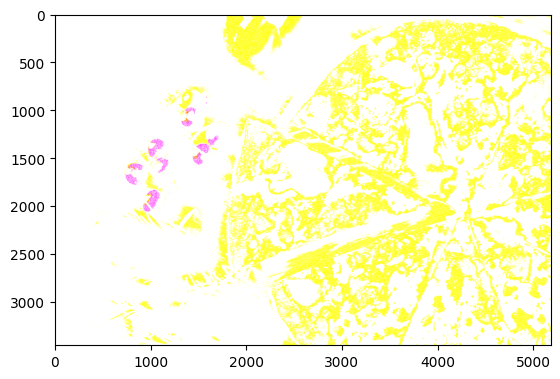

In [90]:
plt.imshow(custom_image.permute(1,2,0))

In [91]:
custom_image_resized = resize(custom_image)

In [92]:
model_1.eval()
with torch.inference_mode():
  model_1(custom_image_resized)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (10x169 and 1690x3)

custom image transformed shape: torch.Size([3, 64, 64])
custom image transformed type: torch.float32


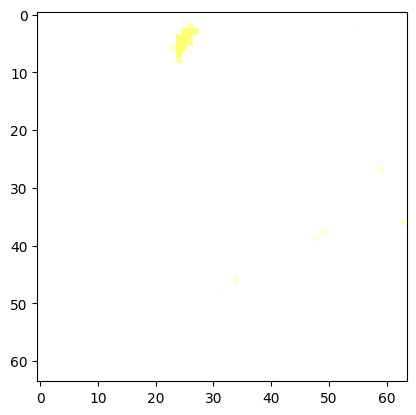

In [93]:
# create transform pipeline to resize image
custom_image_float32 = torchvision.io.read_image(custom_image_path).type(torch.float32)

custom_image_transform = transforms.Compose([
    transforms.Resize(size=(64, 64))
])

custom_image_transformed = custom_image_transform(custom_image_float32)

#print out the shape and type
print(f"custom image transformed shape: {custom_image_transformed.shape}")
print(f"custom image transformed type: {custom_image_transformed.dtype}")
plt.imshow(custom_image_transformed.permute(1,2,0))

In [94]:
#error: no batch size
model_1.eval()
with torch.inference_mode():
  model_1(custom_image_transformed.to(device))

RuntimeError: mat1 and mat2 shapes cannot be multiplied (10x169 and 1690x3)

In [95]:
#this should work: add batch size
model_1.eval()
with torch.inference_mode():
  custom_image_pred = model_1(custom_image_transformed.unsqueeze(0).to(device))
custom_image_pred.argmax(), class_names[custom_image_pred.argmax()]

(tensor(0), 'pizza')

Note to make a prediction on a custom image we had to:
* load the image and turn it into a tensor.
* make sure the image was the same datatype and shape as the the data the model was trained on (3,64,64) with a batch size (1,3,64,64)
* make sure the image was on the same device as our model.
(do not have wrong shape, wrong dtype, wrong device.)

In [96]:
# convert logits -> prediction prob
custom_image_pred_prob = torch.softmax(custom_image_pred, dim=1)
custom_image_pred_prob

tensor([[1.0000e+00, 0.0000e+00, 1.1111e-41]])

In [97]:
# convert probs -> labels
custom_image_pred_label = torch.argmax(custom_image_pred_prob)
custom_image_pred_label

tensor(0)

In [98]:
class_names[custom_image_pred_label]

'pizza'

### 11.3 putting custom image prediction together: building a function

ideal outcome:

a function where we passs an image path to and have our model predict on that image and plot the image + prediction

In [109]:
image_transform = transforms.Compose([transforms.Resize(size=(64,64))])

In [113]:
def custom_image_prediction(model: torch.nn.Module,
                            image_path: str,
                            class_names: List[str] = None,
                            transform = None,
                            device = device
                            ):
  """ make a prediction on a target image with a trained model and plots the image and prediction."""

  # Read the image path and convert dtype to float 32
  target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)

  #divide the image pixel values by 255 to get them between [0, 1]
  target_image = target_image / 255.

  # transform if necessary
  if transform:
    target_image = transform(target_image)

  # make sure model on target device
  model.to(device)

  # turn on eval/inference mode and make a prediction
  model.eval()
  with torch.inference_mode():
    target_image = target_image.unsqueeze(0)
    taeget_image_pred = model(target_image.to(device))

  #convert logits to prob to labels
  custom_image_prob = torch.softmax(custom_image_pred, dim=1)
  custom_image_idx = torch.argmax(custom_image_prob)

  #print prediction and plot the image
  plt.imshow(target_image.squeeze().permute(1,2,0))
  if class_names:
    title = f"pred: {class_names[custom_image_idx.cpu()]} | prob: {custom_image_prob.max().cpu():.3f}"
  else:
    title = f"pred: {custom_image_idx} | prob: {custom_image_prob.max().cpu():.3f}"

  plt.title(title)
  plt.axis("off")

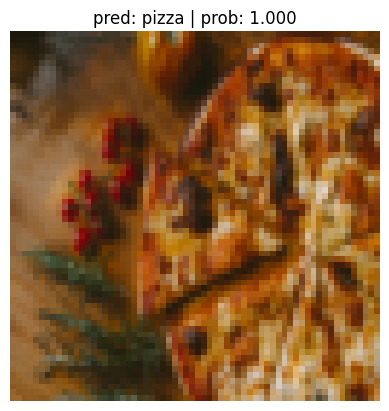

In [116]:
# pred on our custom image
custom_image_prediction(model=model_1,
                        image_path=custom_image_path,
                        class_names=class_names,
                        transform=image_transform,
                        device=device)